#install library

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 6.4 MB 23.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


#project1


import library

In [ ]:
from itsdangerous import BadTimeSignature
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering

# For time stamps
from datetime import datetime

get and prepare dataset

In [ ]:
# Set up End and Start times for data grab
end = datetime.now()
# get data of BTC-USD from 14 years ago
start = datetime(end.year - 14, end.month, end.day)

BTC_USD = yf.download("BTC-USD", start, end)
# show data
BTC_USD

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-05-20,30311.119141,30664.976562,28793.605469,29200.740234,29200.740234,30749382605
2022-05-21,29199.859375,29588.869141,29027.394531,29432.226562,29432.226562,17274840442
2022-05-22,29432.472656,30425.861328,29275.183594,30323.722656,30323.722656,21631532270


calculate daily return

In [ ]:
# calculate daily return
Open_Candle_from_2014_up_2022 = BTC_USD["Open"]
Close_Candle_from_2014_up_2022 = BTC_USD["Close"]
daily_stock_return = 100 * (
    (Close_Candle_from_2014_up_2022 - Open_Candle_from_2014_up_2022)
    / Open_Candle_from_2014_up_2022
)

BTC_USD['daily return']=daily_stock_return

plot daily return during the 14 years


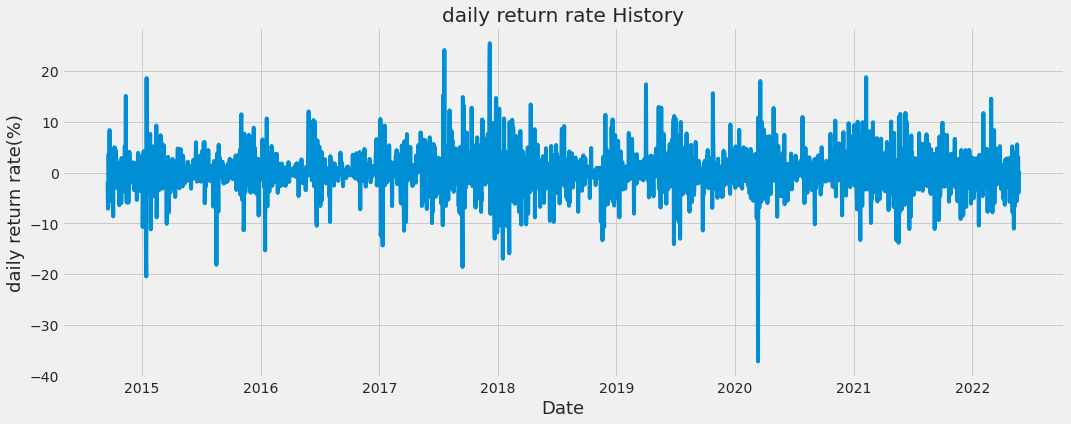

In [ ]:
plt.figure(figsize=(16,6))
plt.title('daily return rate History')
plt.plot(BTC_USD['daily return'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('daily return rate(%)', fontsize=18)
plt.show()

prepare data and model for clustering

In [ ]:
# prepare data as X vector for passing to the model
daily_stock_return_np_array = daily_stock_return.to_numpy()
data_length = np.arange(daily_stock_return_np_array.shape[0])
X = daily_stock_return_np_array.reshape((-1, 1))

# define the clustering model
model = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)

plot output of model clustering

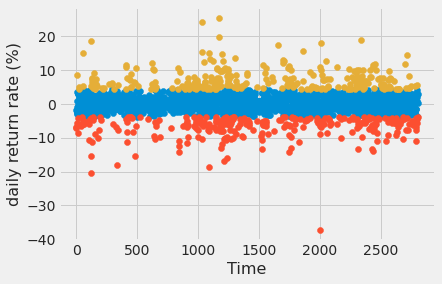

In [ ]:
x_y = np.array([daily_stock_return_np_array, data_length])

# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter((x_y).T[row_ix, 1], (x_y).T[row_ix, 0])
    plt.xlabel("Time", fontsize=16)
    plt.ylabel("daily return rate (%)", fontsize=16)

# show the plot
plt.show()

#project2


import library

In [ ]:
import pandas as pd
import json
from urllib.request import (
    urlopen,
)

# For reading stock data from yahoo
import yfinance as yf
# For time stamps
from datetime import datetime
# for calculating correlation with lag
import statsmodels.api as sm


an other way fot getting BTC-USD data

In [ ]:
# Pulling Bitcoin's price history
btc_url = "https://min-api.cryptocompare.com/data/v2/histoday?fsym=BTC&tsym=USD&limit=2000&api_key=d1875a3943f6f2ee83a90ac2e05d5fa018618e00724e9018f9bd08c0ac932cc6"
btc_data = urlopen(btc_url).read()  # Open the API contents

# Transform the contents of our response into a manageable JSON format
btc_json = json.loads(btc_data)

prepare data to use

In [ ]:
##Transform Bitcoin data so we can run analysis
btc_price = btc_json["Data"][
    "Data"
]  ##Extract only the relevant data from the JSON variable we created earlier
btc_df = pd.DataFrame(
    btc_price
)  ##Convert the json format into a Pandas dataframe so we can make it easier to work with

In [ ]:
btc_df["btc_returns"] = (
    (btc_df["close"] / btc_df["open"]) - 1
) * 100  # We create a coloumn for daily returns of Bitcoin that we'll need for later when we calculate the correlation.
btc_df["Date"] = btc_df["time"].apply(
    lambda x: datetime.utcfromtimestamp(x).strftime("%Y-%m-%d")
)  # Formatting the date into a human-readable format
btc_returns = btc_df[["Date", "btc_returns"]]

get and prepare data of gold and oil

oil part

In [ ]:
##Pulling Oil's price history
oil = yf.Ticker("oil")
oil_df = oil.history(period="max")

##Transform Oil data so we can run analysis
oil_df = (
    oil_df.reset_index()
)  # In the original dataframe, the date is part of the index which means we can't select it later. reset_index shifts the date into a normal column
oil_df["Date"] = oil_df["Date"].apply(lambda x: x.strftime("%Y-%m-%d"))
oil_df["oil_returns"] = ((oil_df["Close"] / oil_df["Open"]) - 1) * 100
oil_returns = oil_df[["Date", "oil_returns"]]

gold part

In [ ]:
##Pulling gold's price history
gold = yf.Ticker("GC=F")
gold_df = gold.history(period="max")

##Transform gold data so we can run analysis
gold_df = gold_df.reset_index()
gold_df["Date"] = gold_df["Date"].apply(lambda x: x.strftime("%Y-%m-%d"))
gold_df["gold_returns"] = ((gold_df["Close"] / gold_df["Open"]) - 1) * 100
gold_returns = gold_df[["Date", "gold_returns"]]


Because gold or oil are not traded on all the days that bitcoin is traded, the dimensions of the datasets are different and heterogeneous, so the data should be created only when everyone is trading.

In [ ]:
# make both dataset a unique size
joint_df_btc_oil = pd.merge(btc_returns, oil_returns)
joint_df_btc_gold = pd.merge(btc_returns, gold_returns)

convert them to numpy array format

In [ ]:
# for Oil
btc_oil_returns_array = joint_df_btc_oil[["btc_returns"]].to_numpy()
oil_btc_returns_array = joint_df_btc_oil[["oil_returns"]].to_numpy()

# for gold
btc_gold_returns_array = joint_df_btc_gold[["btc_returns"]].to_numpy()
gold_btc_returns_array = joint_df_btc_gold[["gold_returns"]].to_numpy()

calculate correlation

BTC-USD / Oil

In [ ]:
correlation_btc_oil = sm.tsa.stattools.ccf(
    btc_oil_returns_array[:,0], oil_btc_returns_array[:,0]
)
correlation_oli_btc = sm.tsa.stattools.ccf(
    oil_btc_returns_array[:,0],  btc_oil_returns_array[:,0]
)

print(correlation_btc_oil[0:10])
print(correlation_oli_btc[0:10])

[ 0.00456155 -0.01760963 -0.01719452 -0.01699583  0.00374477 -0.02748094
 -0.05164071 -0.00078607 -0.04153172 -0.021597  ]
[ 0.00456155  0.00751885  0.03683306 -0.00888612  0.08030725 -0.05410691
  0.02841265 -0.01576723 -0.03364413  0.01524558]


In [ ]:
temp=np.flipud(correlation_oli_btc[1:100])
x=np.concatenate((temp,correlation_btc_oil[0:100]), axis=0)
y = np.arange(-99,100)

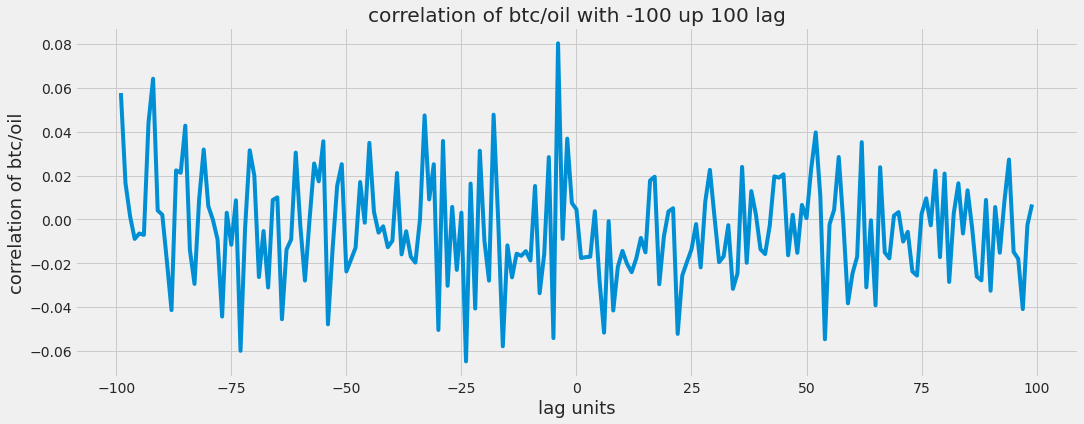

In [ ]:
plt.figure(figsize=(16,6))
plt.title('correlation of btc/oil with -100 up 100 lag')
plt.plot(y,x)
plt.xlabel('lag units', fontsize=18)
plt.ylabel('correlation of btc/oil', fontsize=18)
plt.show()



BTC-USD /Gold

In [ ]:
correlation_btc_gold = sm.tsa.stattools.ccf(
   btc_gold_returns_array[:,0],  gold_btc_returns_array[:,0]
)
correlation_gold_btc= sm.tsa.stattools.ccf(
    gold_btc_returns_array[:,0], btc_gold_returns_array[:,0]
)

print(correlation_btc_gold[0:10])
print(correlation_gold_btc[0:10])

[ 0.0580011  -0.02671897  0.01474268 -0.02599369 -0.03702632 -0.06147728
 -0.03899477  0.01453442 -0.00207982  0.0452187 ]
[ 0.0580011  -0.00603356  0.0454217  -0.0014559   0.05486109 -0.02715188
  0.01019824 -0.10343636 -0.01672136 -0.00302362]


In [ ]:
temp=np.flipud(correlation_btc_gold[1:100])
x=np.concatenate((temp,correlation_gold_btc[0:100]), axis=0)
y = np.arange(-99,100)

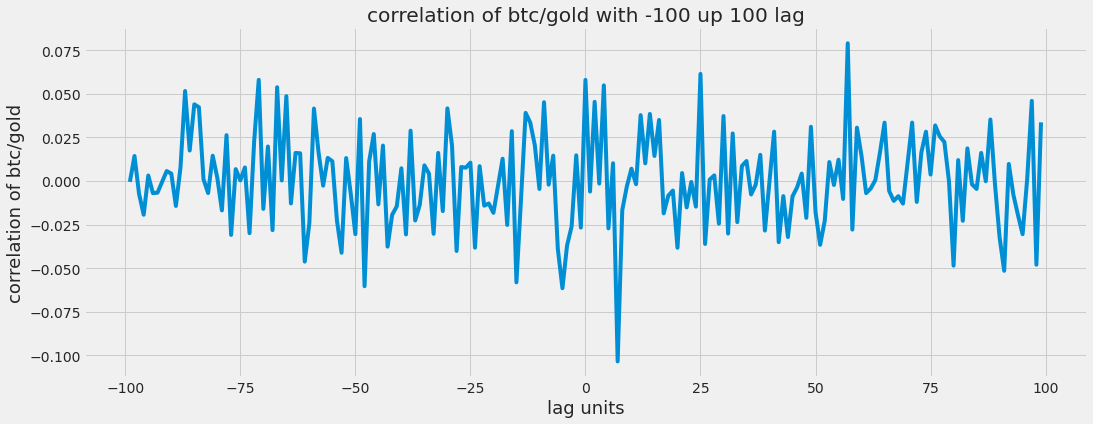

In [ ]:
plt.figure(figsize=(16,6))
plt.title('correlation of btc/gold with -100 up 100 lag')
plt.plot(y,x)
plt.xlabel('lag units', fontsize=18)
plt.ylabel('correlation of btc/gold', fontsize=18)
plt.show()

#project3


import library

In [77]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

#for oneHot encoding of output 
from sklearn.preprocessing import OneHotEncoder

# Scale the data
from sklearn.preprocessing import MinMaxScaler
#for spliting data
from sklearn.model_selection import train_test_split

# agglomerative clustering
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering

#for building simple neural network(only a fully connected)
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
#calculate  metrics of model performace
from sklearn import metrics  

get and prepare data

In [3]:
# Set up End and Start times for data grab
end = datetime.now()
# get data of BTC-USD from 14 years ago
start = datetime(end.year - 14, end.month, end.day)

BTC_USD = yf.download("BTC-USD", start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:
#calculate daily return
Open_Candle_from_2014_up_2022=BTC_USD['Open']
Close_Candle_from_2014_up_2022=BTC_USD['Close']
daily_stock_return=100*((Close_Candle_from_2014_up_2022-Open_Candle_from_2014_up_2022)/Open_Candle_from_2014_up_2022)

#convert daily return to a numpy array for passing it to model
daily_stock_return_np_array=daily_stock_return.to_numpy()
X=daily_stock_return_np_array.reshape((-1,1))
X.shape

(2807, 1)

first clusters the data with unsupervised algorithm to 3 class (like project 1),for extracting label of data

In [7]:
# define the model(use AgglomerativeClustering like project 1)
model = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)

In [20]:
#set X,Y of dataset
Y=yhat.reshape((-1,1))
print('dims of X :'+str(X.shape))
print('dims of Y :'+str(Y.shape))

dims of X :(2807, 1)
dims of Y :(2807, 1)


In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(X)

scaled_data.shape

(2807, 1)

create dataset including: 4 previous value as input and the label of cluster as output

In [37]:
x_ = []
y_ = []

for i in range(4, len(scaled_data)):
    x_.append(scaled_data[i-4:i, 0])
    y_.append(Y[i, 0])

# Convert the x_ and y_ to numpy arrays 
x_, y_ = np.array(x_), np.array(y_)
y_=np.reshape(y_,(-1,1))

In [39]:
#oneHot y
ohe = OneHotEncoder()
y_ = ohe.fit_transform(y_).toarray()
y_.shape

(2803, 3)

split data into training,vadition andtest part(traing=80%,validation=10%,test=10%)

In [41]:
X_train, X_tv, y_train, y_tv = train_test_split(x_, y_, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_tv, y_tv, test_size=0.5, random_state=42)

In [44]:
print('shape of X_train: '+str(X_train.shape))
print('shape of y_train: '+str(y_train.shape))
print('shape of X_val: '+str(X_val.shape))
print('shape of y_val: '+str(y_val.shape))
print('shape of X_test: '+str(X_test.shape))
print('shape of y_test: '+str(y_test.shape))

shape of X_train: (2242, 4)
shape of y_train: (2242, 3)
shape of X_val: (280, 4)
shape of y_val: (280, 3)
shape of X_test: (281, 4)
shape of y_test: (281, 3)



creat model

In [123]:
# Neural network
model = Sequential()
model.add(Dense(30, input_dim=4, activation='relu'))
model.add(Dense(20, input_dim=4, activation='relu'))
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [124]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 30)                150       
                                                                 
 dense_3 (Dense)             (None, 20)                620       
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 3)                 33        
                                                                 
Total params: 1,013
Trainable params: 1,013
Non-trainable params: 0
_________________________________________________________________


In [125]:
#model compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy','AUC'])


#use  earlyStopping method for find best epoch
#set earlyStopping callback
earlyStoppingCallback = tf.keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=3, mode="min", verbose=1
    )

#save  best weight of model
modelCheckpoint = tf.keras.callbacks.ModelCheckpoint(
        'nn.h5',
        save_best_only=True,
        save_weights_only=False,
        verbose=1,
        mode="min",
        monitor="val_loss",
    )

In [126]:
history = model.fit(X_train, y_train, epochs=40, batch_size=128,validation_data=(X_val,y_val),callbacks=[earlyStoppingCallback, modelCheckpoint])

Epoch 1/40
 1/18 [>.............................] - ETA: 10s - loss: 1.1301 - accuracy: 0.1094 - auc: 0.2564
Epoch 1: val_loss improved from inf to 1.08676, saving model to nn.h5
18/18 [==============================] - 1s 19ms/step - loss: 1.1042 - accuracy: 0.1057 - auc: 0.4876 - val_loss: 1.0868 - val_accuracy: 0.3464 - val_auc: 0.6772
Epoch 2/40
 1/18 [>.............................] - ETA: 0s - loss: 1.0856 - accuracy: 0.3750 - auc: 0.6929
Epoch 2: val_loss improved from 1.08676 to 0.96021, saving model to nn.h5
18/18 [==============================] - 0s 4ms/step - loss: 1.0329 - accuracy: 0.7667 - auc: 0.8469 - val_loss: 0.9602 - val_accuracy: 0.7714 - val_auc: 0.8266
Epoch 3/40
 1/18 [>.............................] - ETA: 0s - loss: 0.9372 - accuracy: 0.8203 - auc: 0.8925
Epoch 3: val_loss improved from 0.96021 to 0.81251, saving model to nn.h5
18/18 [==============================] - 0s 5ms/step - loss: 0.8722 - accuracy: 0.7997 - auc: 0.8525 - val_loss: 0.8125 - val_accuracy

plot history and analyses metrics of model

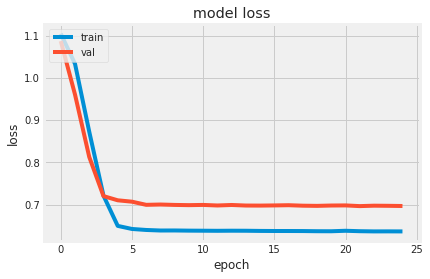

In [127]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

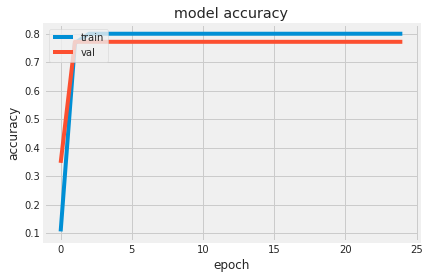

In [128]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

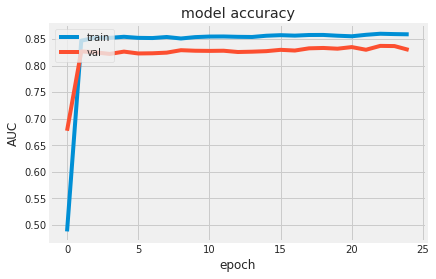

In [129]:
# summarize history for AUC
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model accuracy')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

report metrics of test data

In [130]:
y_pred=model.predict(X_test)

In [131]:
threshold=0.5
f1=metrics.f1_score(y_test, y_pred > threshold, average="micro")
acc=metrics.accuracy_score(y_test, y_pred > threshold)
precision=metrics.precision_score(y_test, y_pred > threshold, zero_division=0,average='micro')
recall=metrics.recall_score(y_test, y_pred > threshold, zero_division=0,average='micro')


print('acc of test part is :'+str(acc))
print('f1 of test part is :'+str(f1))
print('precision of test part is :'+str(precision))
print('recall of test part is :'+str(recall))

acc of test part is :0.8149466192170819
f1 of test part is :0.8149466192170819
precision of test part is :0.8149466192170819
recall of test part is :0.8149466192170819


Plot Confusion Matrix 

In [132]:
def plot_confusion_matrix_sns(y_test, pred):
    """
    This Function plots the confusion matrix using seaborn library.

    Parameters
    ----------
    y_test : numpy.ndarray
        ground trouth array for this image(having shape: (m, #num_classes) ).
    pred : numpy.ndarray
        prediction array for this image (having shape: (m, #num_classes) ).
    path_result : str
        Direct path to the file you want to save the results in.
    """

    cm = confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1))
    plt.figure(figsize=(6, 6))
    ax = sns.heatmap(cm, annot=True, fmt="d")
    ax.set_ylim(8.0, -1.0)
    plt.title("Confusion matrix")
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label")
    #plt.savefig(path_result)
    plt.subplots_adjust(
        top=0.94, bottom=0.11, left=0.12, right=1.00, hspace=0.20, wspace=0.18
    )
    plt.show()
    plt.close()


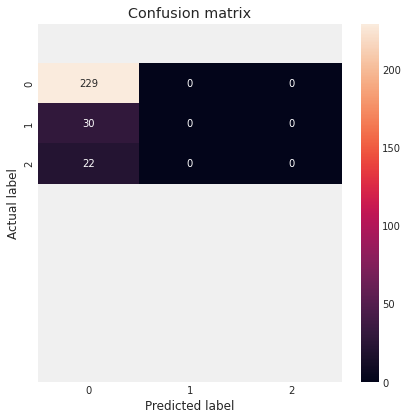

In [133]:
plot_confusion_matrix_sns(y_test, y_pred)